In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 

In [53]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [54]:
#partition Dtat
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [55]:
def train(data, degree):
    poly = PolynomialFeatures(degree = degree)
    X = poly.fit_transform(data[:, 0].reshape(-1, 1))
    y = data[:, 1].reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)

    return reg

In [56]:
# ret = train(trainData[0], 3)

# plt.scatter(testData[:, 0], testData[:, 1])
# X = PolynomialFeatures(degree = 3).fit_transform(testData[:, 0].reshape(-1, 1))
# testPred = ret.predict( X )
# plt.scatter(testData[:, 0], testPred)

# plt.show()

In [97]:
def bias2_calc(testPred, testData):
    num = len(testData)
    y = testData[:, 1]
    tot1 = 0
    for i in range(0, num):
        tot1 += testPred[i]
    eFCap = tot1/ num
    bias_sq = 0
    for i in range(0, num):
        bias_sq += (eFCap - y[i])**2
    return bias_sq


def variance_calc(testPred, testData):
    num = len(testData)
    y = testData[:, 1]
    tot1 = 0
    for i in range(0, num):
        tot1 += testPred[i]
    eFCap = tot1/num
    tot2 = 0
    for i in range(0, num):
        tot2 += (testPred[i] - eFCap)**2
    tot2 = tot2/num
    return tot2


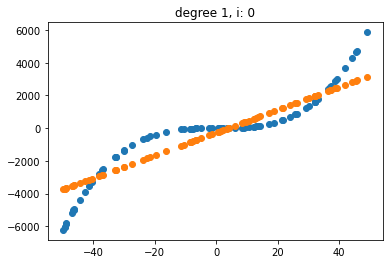

bias^2: [5.28896218e+08] variance: [4229812.00983399]


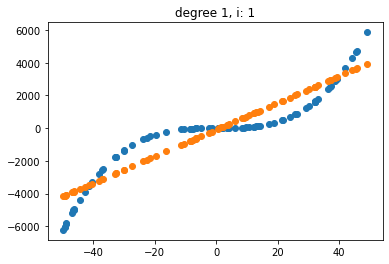

bias^2: [5.30642008e+08] variance: [5829578.70028088]


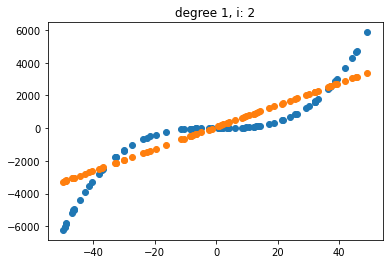

bias^2: [5.38439339e+08] variance: [3927150.44556833]


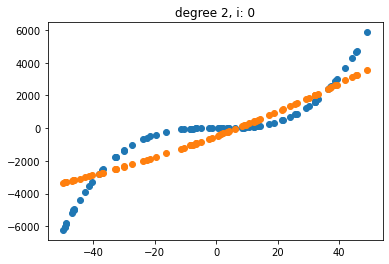

bias^2: [5.28891875e+08] variance: [4090458.53680809]


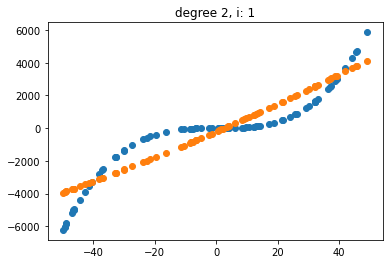

bias^2: [5.30688149e+08] variance: [5686534.85878636]


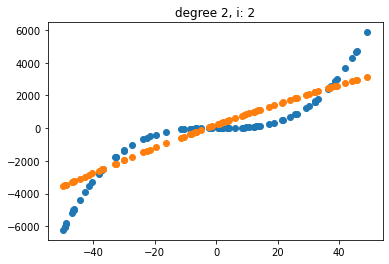

bias^2: [5.37831539e+08] variance: [4076450.63982016]


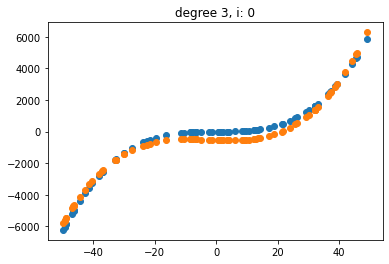

bias^2: [5.32267231e+08] variance: [6023689.62423725]


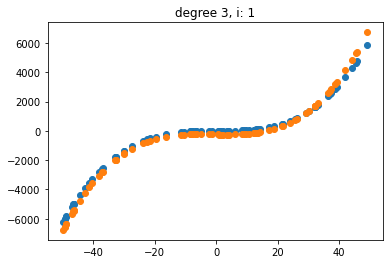

bias^2: [5.30545372e+08] variance: [7900958.66307736]


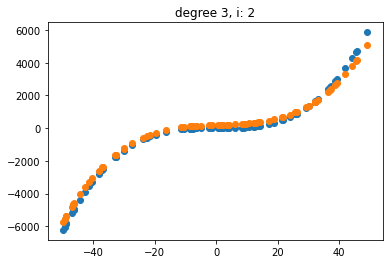

bias^2: [5.30081151e+08] variance: [5655002.95362274]


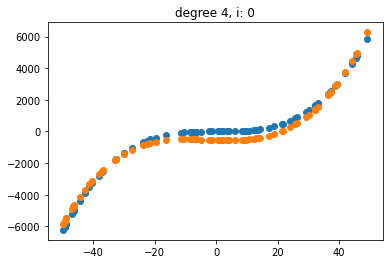

bias^2: [5.32320419e+08] variance: [6032768.27889368]


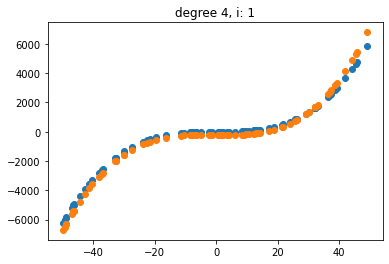

bias^2: [5.30433238e+08] variance: [7862843.52939492]


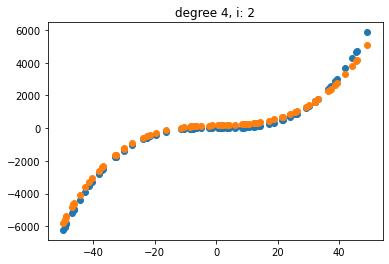

bias^2: [5.29998911e+08] variance: [5691233.31996135]


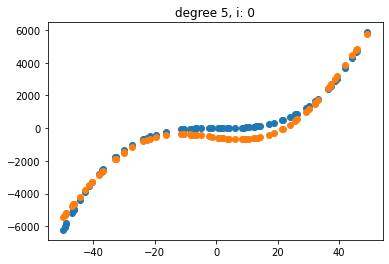

bias^2: [5.32043834e+08] variance: [5898218.51639047]


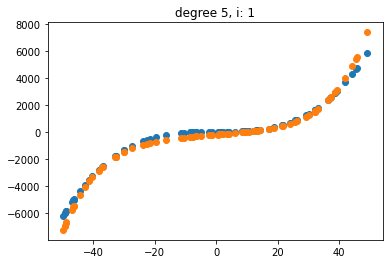

bias^2: [5.30779237e+08] variance: [8128830.86961187]


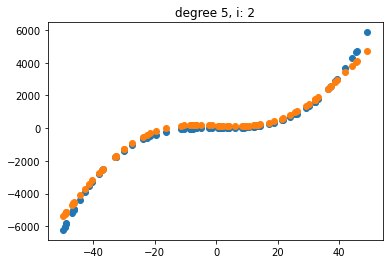

bias^2: [5.30363356e+08] variance: [5534698.46172937]


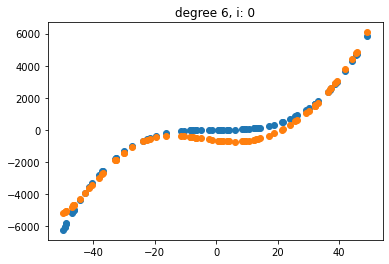

bias^2: [5.32156888e+08] variance: [5858597.3685551]


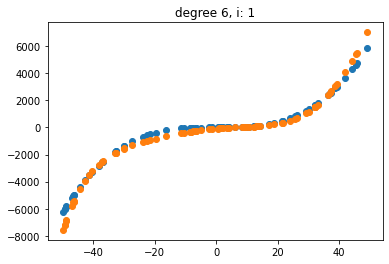

bias^2: [5.30610906e+08] variance: [8253969.50052437]


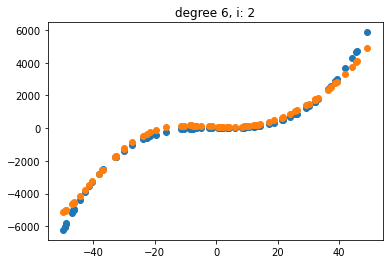

bias^2: [5.30365221e+08] variance: [5437624.08470848]


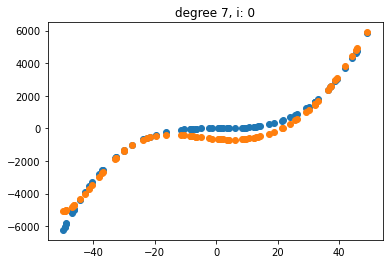

bias^2: [5.3208689e+08] variance: [5816854.18709635]


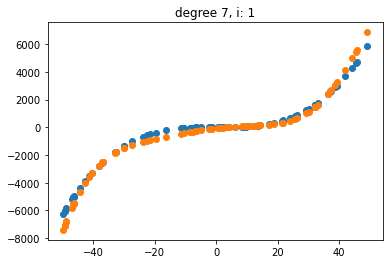

bias^2: [5.30546559e+08] variance: [8186287.00833891]


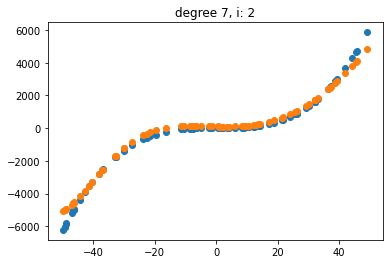

bias^2: [5.30437052e+08] variance: [5416237.8887944]


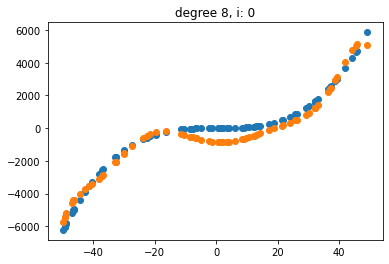

bias^2: [5.33505307e+08] variance: [5821240.67393135]


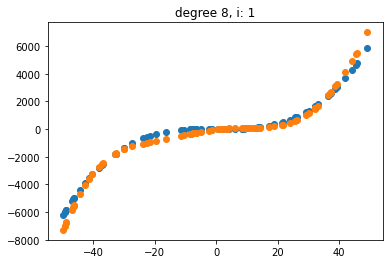

bias^2: [5.30337521e+08] variance: [8183522.7122616]


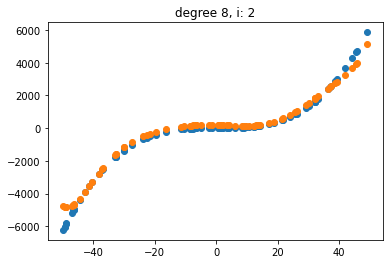

bias^2: [5.30854278e+08] variance: [5382453.17460538]


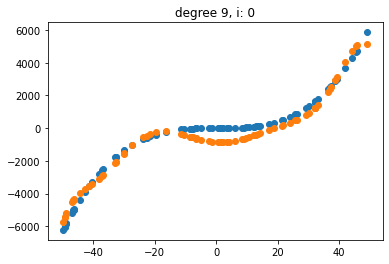

bias^2: [5.33474209e+08] variance: [5826296.41624374]


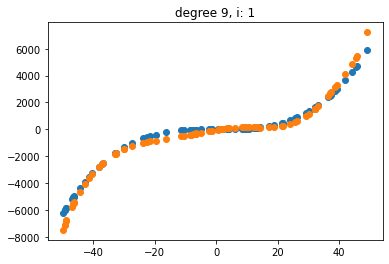

bias^2: [5.30308859e+08] variance: [8277460.27198338]


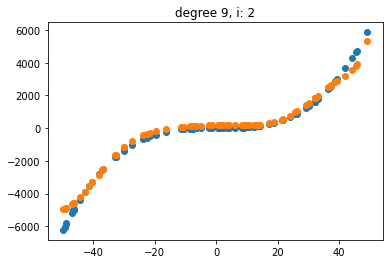

bias^2: [5.30896238e+08] variance: [5431204.96596263]


In [98]:
bias2Arr = [0] * 10 
varianceArr = [0] * 10
for deg in range(1, 10): # should be 1, 10
    for i in range(0, 3): #should be 0, 10
        ret = train(trainData[i], deg)
        plt.scatter(testData[:, 0], testData[:, 1])
        X = PolynomialFeatures(degree = deg).fit_transform(testData[:, 0].reshape(-1, 1))
        testPred = ret.predict( X )
        plt.scatter(testData[:, 0], testPred)
        plt.title('degree ' + str(deg) + ', i: ' + str(i))
        plt.show()
        print('bias^2: ' + str(bias2_calc(testPred, testData)) + ' variance: ' + str(variance_calc(testPred, testData)))
        bias2Arr[deg] += bias2_calc(testPred, testData)
        varianceArr[deg] += variance_calc(testPred, testData)
        

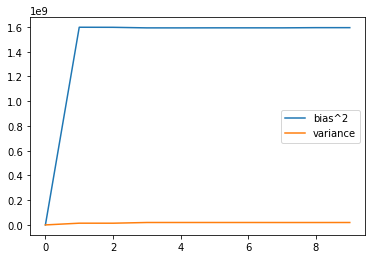

In [95]:
plt.plot(bias2Arr, label='bias^2')
plt.plot(varianceArr, label='variance')

plt.legend()
plt.show()